<a href="https://colab.research.google.com/github/MariamAlaa25/Polynomial-Regression-with-Keras/blob/main/PyTorch_Regression7835.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import important libraries**

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Load the Dataset**

In [3]:
df = pd.read_csv('/content/Housing-1.csv')

## Check for null

In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## **Convert the categorical columns to numerical to train the model**

In [ ]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
label_encoder = LabelEncoder()
area_unscaled = df['area'].values
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

## **Scaling the area and price using min max scaler**
# **Rule:**


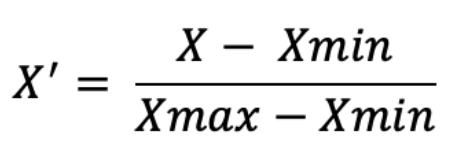

In [ ]:
scaler = MinMaxScaler()
df[['area', 'price']] = scaler.fit_transform(df[['area', 'price']])

## **Data after applying min max scaler and encoding the categorical columns**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,0


## **Split the data into training and testing sets (70% train, 30% test)**
I splitted the area to preserve the area original values to be plotted with the predicted and original prices

In [ ]:
X = df.drop(columns=['price']).values
y = df['price'].values
X_train, X_test, y_train, y_test, area_train, area_test = train_test_split(X, y, area_unscaled, test_size=0.3, random_state=42)

## **convert the NumPy arrays X_train,X_test,Y_train,and Y_test into PyTorch tensors**
- .view(-1, 1):reshaping y_test and y_train into a 2D array

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Building the ANN model using 5 layers and Activation function(ReLU)

In [ ]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),  # First layer
    nn.ReLU(),                        # Activation function
    nn.Linear(256, 128),              # Second layer
    nn.ReLU(),
    nn.Linear(128, 64),               # Third layer
    nn.ReLU(),
    nn.Linear(64, 32),                # Fourth layer
    nn.ReLU(),
    nn.Linear(32, 1)                  # Output layer
)

## Define the loss function and optimizer

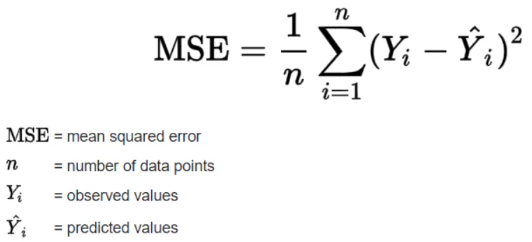

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the model

In [ ]:
epochs =50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch [{epoch + 1}], Train Loss: {train_losses[-1]:.4f}')

Epoch [1], Train Loss: 0.0022
Epoch [2], Train Loss: 0.0173
Epoch [3], Train Loss: 0.0037
Epoch [4], Train Loss: 0.0071
Epoch [5], Train Loss: 0.0084
Epoch [6], Train Loss: 0.0034
Epoch [7], Train Loss: 0.0026
Epoch [8], Train Loss: 0.0047
Epoch [9], Train Loss: 0.0059
Epoch [10], Train Loss: 0.0052
Epoch [11], Train Loss: 0.0036
Epoch [12], Train Loss: 0.0025
Epoch [13], Train Loss: 0.0027
Epoch [14], Train Loss: 0.0039
Epoch [15], Train Loss: 0.0040
Epoch [16], Train Loss: 0.0030
Epoch [17], Train Loss: 0.0022
Epoch [18], Train Loss: 0.0023
Epoch [19], Train Loss: 0.0028
Epoch [20], Train Loss: 0.0031
Epoch [21], Train Loss: 0.0027
Epoch [22], Train Loss: 0.0021
Epoch [23], Train Loss: 0.0018
Epoch [24], Train Loss: 0.0022
Epoch [25], Train Loss: 0.0024
Epoch [26], Train Loss: 0.0022
Epoch [27], Train Loss: 0.0017
Epoch [28], Train Loss: 0.0017
Epoch [29], Train Loss: 0.0019
Epoch [30], Train Loss: 0.0020
Epoch [31], Train Loss: 0.0017
Epoch [32], Train Loss: 0.0015
Epoch [33], Train

## Evaluating the model's performance using metrics MSE, Mean Absolute Error (MAE) or R-squared and Visualizing the predicted vs. actual prices for each area value

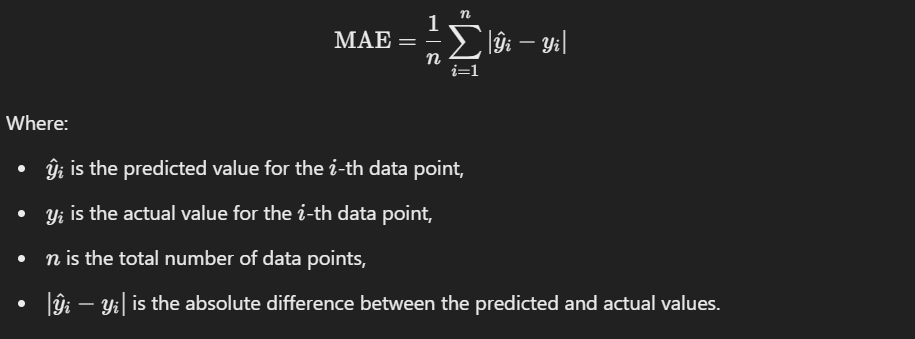

##R2:
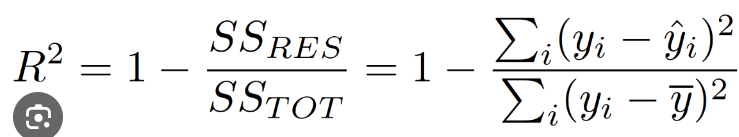

\Evaluating the model performance
Mean Squared Error : 0.0106
Mean Absolute Error : 0.0748
R-squared: 0.6731


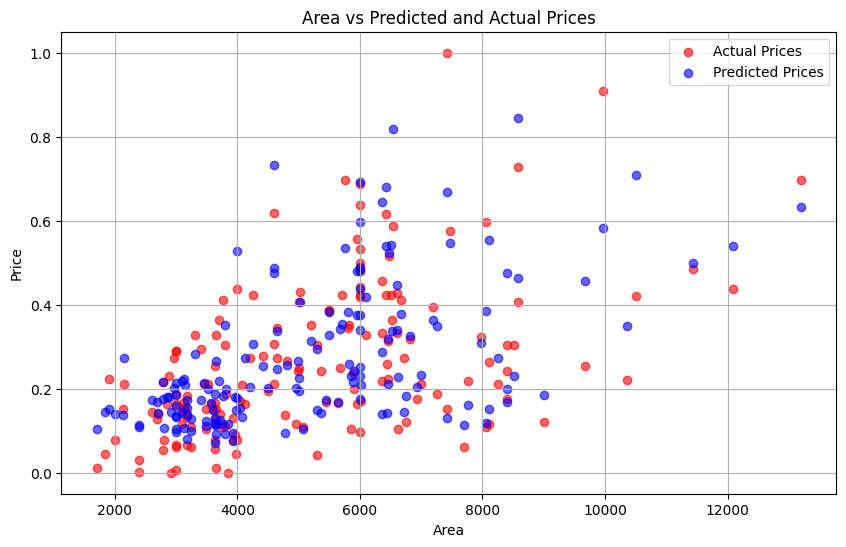

In [ ]:
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
    r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
    print(f'\Evaluating the model performance')
    print(f'Mean Squared Error : {mse:.4f}')
    print(f'Mean Absolute Error : {mae:.4f}')
    print(f'R-squared: {r2:.4f}')
    plt.figure(figsize=(10, 6))
    plt.scatter(area_test, y_test_tensor.numpy(), color='red', label='Actual Prices', alpha=0.6)
    plt.scatter(area_test, predictions.numpy(), color='blue', label='Predicted Prices', alpha=0.6)
    plt.title('Area vs Predicted and Actual Prices')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()